# Creating Bike and Pedestrian Skims from Open Street Map Linework

For environment see: https://github.com/gboeing/osmnx 

    conda config --prepend channels conda-forge
    
    conda create -n ox --strict-channel-priority osmnx
    
* also include nb_conda, nb_conda_kernels, and ipykernel

In [1]:
import geopandas as gpd
import osmnx
import pandas as pd

## Prepare Data for Routing

In [2]:
#import TAZs
tazs = gpd.read_file('E:/Shared drives/TMD_TSA/Data/MoDX/modx/canonical_TAZ_shapefile/candidate_CTPS_TAZ_STATEWIDE_2019.geojson')

In [3]:
#import mpo
mpo = gpd.read_file('M:/JupyterHome/JupyterNotebooks/Ped_Bike_Skims_OSM/Ped_Bike_Skims_OSM/MPO_Polygon.shp')

In [4]:
#set the projected crs
tazs = tazs.to_crs('EPSG:26986')

In [5]:
#boundaries for TAZ
states = tazs.dissolve(by='state')

<AxesSubplot:>

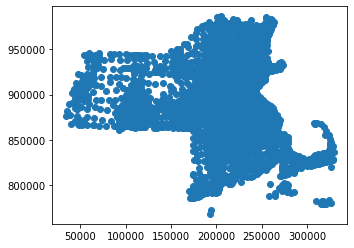

In [6]:
#centroids of TAZs
centroids = tazs.copy(deep=True)
centroids.geometry = centroids.centroid
centroids.plot()

<AxesSubplot:>

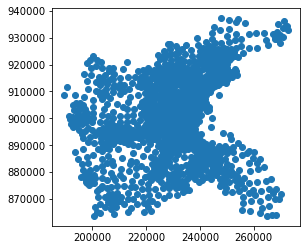

In [8]:
#clip TAZ centroids to MPO polygon
mpo_cen = gpd.clip(centroids, mpo, keep_geom_type = True)
mpo_cen.plot()

### Load Networks from Disk 
Only available if have run the section 'Run ONLY if Changing Study Area'

In [10]:
bike_net = osmnx.load_graphml('E:/Shared drives/TMD_TSA/Data/Non_Motorized_Networks/bike_net_MPO.graphml')

In [11]:
ped_net = osmnx.load_graphml('E:/Shared drives/TMD_TSA/Data/Non_Motorized_Networks/ped_net_MPO.graphml')

### Look at Networks

In [15]:
#print(bike_net.edges(keys=True, data=True))
bike_edges = osmnx.utils_graph.graph_to_gdfs(bike_net, nodes = False, edges = True,
                                             node_geometry = False, fill_edge_geometry = False)
bike_edges.head()

osmid oneway lanes              name      highway  \
u        v          key                                                        
61283119 61283126   0    8615341   True     1  Brookline Street     tertiary   
         61321743   0    8616058  False     2      Henry Street  residential   
         61283322   0    8616167   True     1      Henry Street  residential   
61283126 61321144   0    8615341   True     1  Brookline Street     tertiary   
         6758780152 0    8615430  False     1   Chestnut Street  residential   

                        maxspeed   length  \
u        v          key                     
61283119 61283126   0     25 mph  105.188   
         61321743   0     25 mph  136.016   
         61283322   0     25 mph   44.369   
61283126 61321144   0     25 mph  102.839   
         6758780152 0     25 mph   37.569   

                                                                  geometry  \
u        v          key                                                      
61283119 61283126   0    LINESTRING (-71.10958 42.35590, -71.10950 42.3...   
         61321743   0    LINESTRING (-71.10958 42.35590, -71.10949 42.3...   
         61283322   0    LINESTRING (-71.10958 42.35590, -71.10966 42.3...   
61283126 61321144   0    LINESTRING (-71.10879 42.35665, -71.10875 42.3...   
         6758780152 0    LINESTRING (-71.10879 42.35665, -71.10875 42.3...   

                        width  ref junction bridge service access tunnel area  \
u        v          key                                                         
61283119 61283126   0     NaN  NaN      NaN    NaN     NaN    NaN    NaN  NaN   
         61321743   0    12.2  NaN      NaN    NaN     NaN    NaN    NaN  NaN   
         61283322   0    12.2  NaN      NaN    NaN     NaN    NaN    NaN  NaN   
61283126 61321144   0     NaN  NaN      NaN    NaN     NaN    NaN    NaN  NaN   
         6758780152 0    11.9  NaN      NaN    NaN     NaN    NaN    NaN  NaN   

                        est_width landuse  
u        v          key                    
61283119 61283126   0         NaN     NaN  
         61321743   0         NaN     NaN  
         61283322   0         NaN     NaN  
61283126 61321144   0         NaN     NaN  
         6758780152 0         NaN     NaN

In [18]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

bike_edges

osmid oneway lanes              name  \
u          v          key                                             
61283119   61283126   0      8615341   True     1  Brookline Street   
           61321743   0      8616058  False     2      Henry Street   
           61283322   0      8616167   True     1      Henry Street   
61283126   61321144   0      8615341   True     1  Brookline Street   
           6758780152 0      8615430  False     1   Chestnut Street   
...                              ...    ...   ...               ...   
9170677363 9170677366 0    298681627  False     2   Railroad Avenue   
                      1    992587133   True   NaN               NaN   
           72803235   0    298681627  False     2   Railroad Avenue   
9170677366 9170677363 0    298681627  False     2   Railroad Avenue   
           72798487   0    298681627  False     2   Railroad Avenue   

                               highway maxspeed   length  \
u          v          key                                  
61283119   61283126   0       tertiary   25 mph  105.188   
           61321743   0    residential   25 mph  136.016   
           61283322   0    residential   25 mph   44.369   
61283126   61321144   0       tertiary   25 mph  102.839   
           6758780152 0    residential   25 mph   37.569   
...                                ...      ...      ...   
9170677363 9170677366 0    residential   20 mph   27.468   
                      1        service      NaN   60.604   
           72803235   0    residential   20 mph   93.528   
9170677366 9170677363 0    residential   20 mph   27.468   
           72798487   0    residential   20 mph   62.686   

                                                                    geometry  \
u          v          key                                                      
61283119   61283126   0    LINESTRING (-71.10958 42.35590, -71.10950 42.3...   
           61321743   0    LINESTRING (-71.10958 42.35590, -71.10949 42.3...   
           61283322   0    LINESTRING (-71.10958 42.35590, -71.10966 42.3...   
61283126   61321144   0    LINESTRING (-71.10879 42.35665, -71.10875 42.3...   
           6758780152 0    LINESTRING (-71.10879 42.35665, -71.10875 42.3...   
...                                                                      ...   
9170677363 9170677366 0                                                 None   
                      1    LINESTRING (-71.28711 42.48907, -71.28693 42.4...   
           72803235   0    LINESTRING (-71.28711 42.48907, -71.28699 42.4...   
9170677366 9170677363 0                                                 None   
           72798487   0    LINESTRING (-71.28728 42.48886, -71.28761 42.4...   

                          width  ref junction bridge        service access  \
u          v          key                                                    
61283119   61283126   0     NaN  NaN      NaN    NaN            NaN    NaN   
           61321743   0    12.2  NaN      NaN    NaN            NaN    NaN   
           61283322   0    12.2  NaN      NaN    NaN            NaN    NaN   
61283126   61321144   0     NaN  NaN      NaN    NaN            NaN    NaN   
           6758780152 0    11.9  NaN      NaN    NaN            NaN    NaN   
...                         ...  ...      ...    ...            ...    ...   
9170677363 9170677366 0    15.2  NaN      NaN    NaN            NaN    NaN   
                      1     NaN  NaN      NaN    NaN  parking_aisle    NaN   
           72803235   0    15.2  NaN      NaN    NaN            NaN    NaN   
9170677366 9170677363 0    15.2  NaN      NaN    NaN            NaN    NaN   
           72798487   0    15.2  NaN      NaN    NaN            NaN    NaN   

                          tunnel area est_width landuse  
u          v          key                                
61283119   61283126   0      NaN  NaN       NaN     NaN  
           61321743   0      NaN  NaN       NaN     NaN  
           61283322   0      NaN  NaN 

## Run ONLY if Changing Study Area

In [ ]:
#update the attributes retrieved from OSM in settings.py
useful_tags_path = ['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name',
                    'highway', 'maxspeed', 'service', 'access', 'area',
                    'landuse', 'width', 'est_width', 'junction', 
                    'surface', 'smoothness','cycleway', 'footway', 'sidewalk']
osmnx.utils.config(useful_tags_path = useful_tags_path)

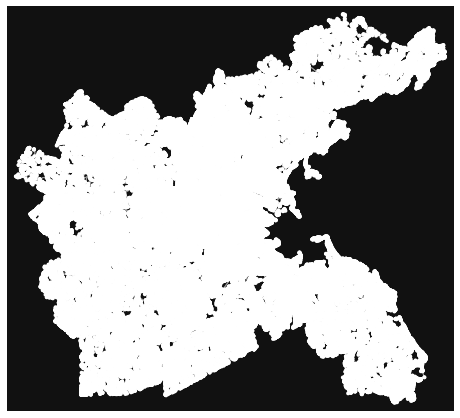

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
#grab from OSM the bike and pedestrian networks for the MPO
#WARNING: Takes 48 hours to run (for both bike and ped together)
bike_net = osmnx.graph_from_polygon(mpo.to_crs('EPSG:4326').unary_union, network_type='bike')
#ped_net = osmnx.graph_from_polygon(mpo.to_crs('EPSG:4326').unary_union, network_type='walk')

In [6]:
#Save to Disk (Bike)
filepath = "E:/Shared drives/TMD_TSA/Data/Non_Motorized_Networks/bike_net_MPO.graphml"
osmnx.save_graphml(bike_net, filepath)


In [ ]:
ped_net = osmnx.graph_from_polygon(mpo.to_crs('EPSG:4326').unary_union, network_type='walk')

In [7]:
#Save to Disk (Ped)
filepath = "E:/Shared drives/TMD_TSA/Data/Non_Motorized_Networks/ped_net_MPO.graphml"
osmnx.save_graphml(ped_net, filepath)

## Not Used - but Useful Snippets

<AxesSubplot:>

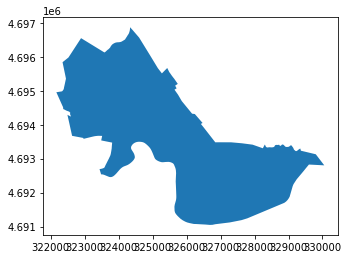

In [6]:
cambridge = osmnx.geocode_to_gdf('Cambridge, Massachusetts')
osmnx.project_gdf(cambridge).plot()